### The Multi-Armed Bandit Problem

A fixed limited set of resources must be allocated between competing alternative choices in a way that maximizes their expected gain, when each choice's properties are only partially known at the time of allocation, and may become better understood as time passes or by allocating resources to the choice.
Examples: Given slot machines with unknown different distributions, find which slot machine is most favorable.
EXPLOTATION-EXPLORATION DILEMMA

### Upper Confidence Bound Algorithm

- Given d arms. An arm could be an advertisement displayed to users each time open a YouTube video
- Each time a user plays a video, that makes 1 round
- At each round n, 1 ad is chosen to be played for the user.
- At each round n, ad i gives a 0/1 reward. 1 if the ad is successful and 0 if the ad is unsuccessful.
- Objective: maximize the total reward over several rounds.

Algorithm:
1) Start by considering a common return for all machines
2) Create a confidence band for each machine. 
3) Pick the machine with the highest upper limit in its confidence band.
4) Take action with the chosen machine. If the reward is negative, then the observed average expectation decreases. The confidence interval likely decreases.
5) Find the machine with the highest confidence band and repeat.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [3]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing the Upper Confidence Bound

In [13]:
from math import sqrt
from math import log
N = 10**4
d = 10
ads_selected = []
number_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0): # Has the ad been selected?
            average_reward = sum_of_rewards[i] / number_of_selections[i]
            delta_i = sqrt(3 * log(n + 1) / 2 * number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 10**400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
        ads_selected.append(ad)
        number_of_selections[ad] += 1
        reward = dataset.values[n, ad]
        sum_of_rewards[ad] += reward
        total_reward += reward

### Visualizing Results

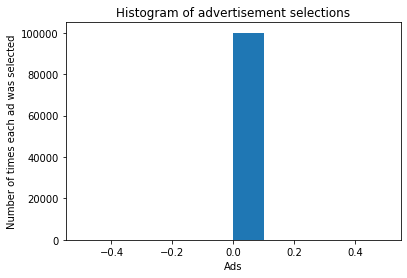

In [15]:
plt.hist(ads_selected)
plt.title('Histogram of advertisement selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()